# 建模

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import statsmodels.api as sm

In [5]:
# load data
history = pd.read_csv('../data/results/history.csv', index_col='time',parse_dates=True)
ssp245 = pd.read_csv('../data/results/ssp245.csv', index_col=0)
ssp585 = pd.read_csv('../data/results/ssp585.csv', index_col=0)
history_wl = pd.read_csv('../data/results/history_wl.csv', index_col='time',parse_dates=True)
fengqiao = pd.read_csv('../data/intermediate/fengqiao_interpolated.csv', index_col='time',parse_dates=True)
history_discharge = fengqiao['discharge']

precip_history = history['precip_suzhou']
precip_ssp245 = ssp245['precip_suzhou']
precip_ssp585 = ssp585['precip_suzhou']

## Discharge_fengqiao

In [7]:
import matplotlib.pyplot as plt

features = history[['precip_suzhou','runoff_suzhou','ETo_HS']]
features = sm.add_constant(features)

model = sm.OLS(history_discharge, features).fit()

y_pred = model.predict(features)
mse = mean_squared_error(history_discharge, y_pred)
r2 = r2_score(history_discharge, y_pred)
print('Mean Squared Error:', mse)
print('R2:', r2)

features_ssp245 = ssp245[['precip_suzhou','runoff_suzhou','ETo_HS']]
features_ssp245 = sm.add_constant(features_ssp245)

discharge_ssp245 = model.predict(features_ssp245)
features_ssp585 = ssp585[['precip_suzhou','runoff_suzhou','ETo_HS']]
features_ssp585 = sm.add_constant(features_ssp585)
discharge_ssp585 = model.predict(features_ssp585)


Mean Squared Error: 197.82903607248727
R2: 0.6177104851839923


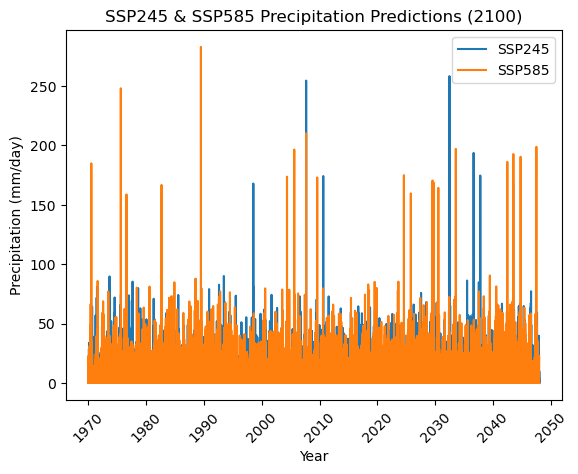

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the discharge for SSP245
ssp245_line, = ax.plot(precip_ssp245.index, precip_ssp245.values, label='SSP245')

# Plot the discharge for SSP585
ssp585_line, = ax.plot(precip_ssp585.index, precip_ssp585.values, label='SSP585')

# Format x-axis as years
years_interval = mdates.YearLocator(base=10)  # Specify 10-year interval
ax.xaxis.set_major_locator(years_interval)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Precipitation (mm/day)')
plt.title('SSP245 & SSP585 Precipitation Predictions (2100)')
plt.legend()

# Show the plot
plt.show()

## Water_level_suzhou

In [9]:
import matplotlib.pyplot as plt

features = history[['precip_suzhou','runoff_suzhou','ETo_HS']]
features = sm.add_constant(features)

model = sm.OLS(history_wl, features).fit()

y_pred = model.predict(features)
mse = mean_squared_error(history_wl, y_pred)
r2 = r2_score(history_wl, y_pred)
print('Mean Squared Error:', mse)
print('R2:', r2)

features_ssp245 = ssp245[['precip_suzhou','runoff_suzhou','ETo_HS']]
features_ssp245 = sm.add_constant(features_ssp245)
wl_ssp245 = model.predict(features_ssp245)
features_ssp585 = ssp585[['precip_suzhou','runoff_suzhou','ETo_HS']]
features_ssp585 = sm.add_constant(features_ssp585)
wl_ssp585 = model.predict(features_ssp585)


Mean Squared Error: 0.05074960790634314
R2: 0.12381364833903052


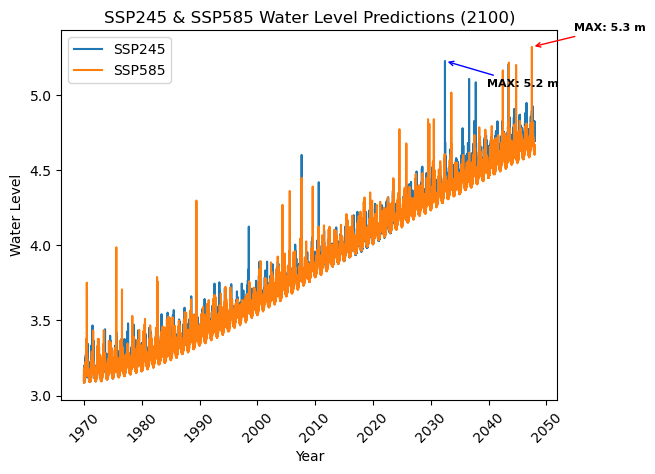

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the water level for SSP245
ax.plot(wl_ssp245.index, wl_ssp245.values, label='SSP245')

# Plot the water level for SSP585
ax.plot(wl_ssp585.index, wl_ssp585.values, label='SSP585')

# Format x-axis as years
years_interval = mdates.YearLocator(base=10)  # Specify 10-year interval
ax.xaxis.set_major_locator(years_interval)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Water Level')
plt.title('SSP245 & SSP585 Water Level Predictions (2100)')
plt.legend()

# Find the highest points for SSP245
ssp245_highest_index = wl_ssp245.idxmax()
ssp245_highest_value = wl_ssp245.max()

# Find the highest points for SSP585
ssp585_highest_index = wl_ssp585.idxmax()
ssp585_highest_value = wl_ssp585.max()

# Annotate the highest point for SSP245
ax.annotate(f'MAX: {ssp245_highest_value:.1f} m', xy=(ssp245_highest_index, ssp245_highest_value),
             xytext=(30, -20), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='blue'),
             fontsize=8, fontweight='bold', ha='left', va='bottom')

# Annotate the highest point for SSP585
ax.annotate(f'MAX: {ssp585_highest_value:.1f} m', xy=(ssp585_highest_index, ssp585_highest_value),
             xytext=(30, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=8, fontweight='bold', ha='left', va='bottom')

# Show the plot
plt.show()

In [11]:
ssp245['wl'] = wl_ssp245
ssp585['wl'] = wl_ssp585
history['wl'] = history_wl
history['discharge_fengqiao'] = history_discharge
ssp245['discharge_fengqiao'] = discharge_ssp245
ssp585['discharge_fengqiao'] = discharge_ssp585
history.to_csv('../data/results/history_final.csv')
ssp245.to_csv('../data/results/ssp245_final.csv')
ssp585.to_csv('../data/results/ssp585_final.csv')

# 调参

In [12]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 0.5, 1, 5, 10],
    'l1_ratio': [0.1, 0.5, 0.9, 0.99] 
}

grid_search = GridSearchCV(ElasticNet(), param_grid, cv=5)  
grid_search.fit(features, history_wl)  
best_model = grid_search.best_estimator_

Mean Squared Error: 0.05266685916336087
R2: 0.09071251803662672


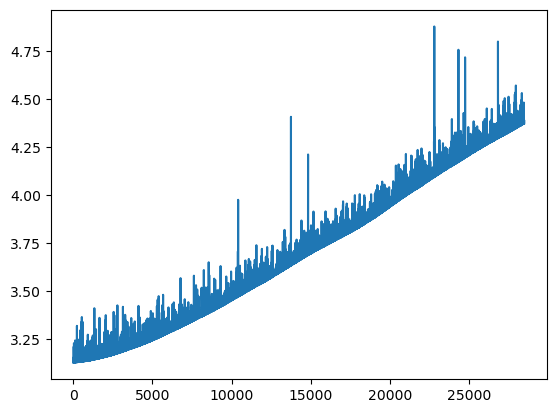

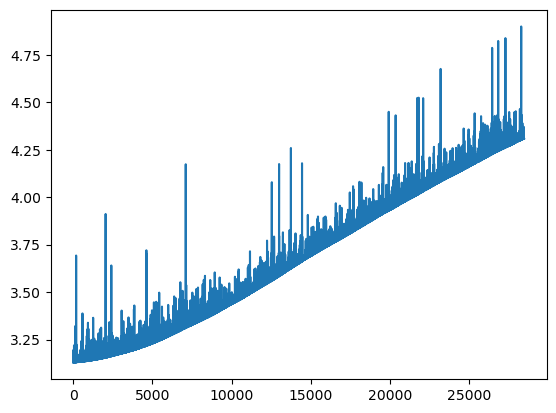

In [13]:
#使用best_model预测训练数据
y_pred = best_model.predict(features)  
mse = mean_squared_error(history_wl, y_pred)
r2 = r2_score(history_wl, y_pred)
print('Mean Squared Error:', mse)  
print('R2:', r2)

#使用best_model预测ssp245
features_ssp245 = ssp245[['precip_suzhou','runoff_suzhou','ETo_HS']]
features_ssp245 = sm.add_constant(features_ssp245) 

wl_ssp245 = best_model.predict(features_ssp245)  

plt.plot(wl_ssp245)
plt.show()

#使用best_model预测ssp585
features_ssp585 = ssp585[['precip_suzhou','runoff_suzhou','ETo_HS']] 
features_ssp585 = sm.add_constant(features_ssp585)

wl_ssp585 = best_model.predict(features_ssp585)   

plt.plot(wl_ssp585)
plt.show()

调完参数后，发现模型的效果并没有提升，所以还是使用原来的模型

# 数据分析

## MAE 和 RMSE

In [14]:
y_pred

array([2.9199739 , 2.92003032, 2.92008665, ..., 3.12959682, 3.12960355,
       3.12961028])

In [15]:
MAE = mean_absolute_error(history_discharge, y_pred) 
print('MAE:', MAE)
RMSE = mean_squared_error(history_discharge, y_pred) 
print('RMSE:', RMSE)
R2 = r2_score(history_discharge, y_pred)
print('R2:', R2)

MAE: 48.70622199719967
RMSE: 2885.392833821238
R2: -4.57580145156716


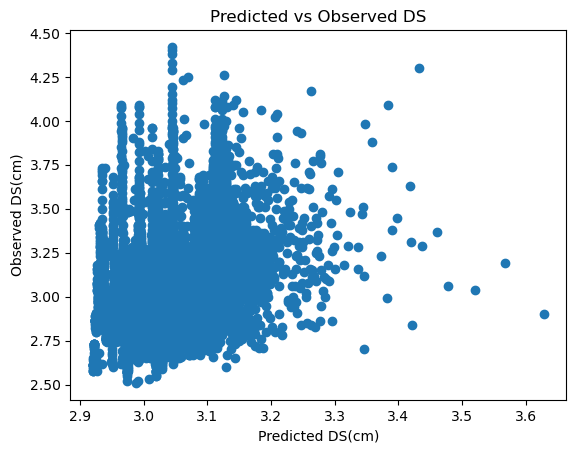

In [16]:
plt.scatter(y_pred, history_wl)
plt.xlabel('Predicted DS(cm)')
plt.ylabel('Observed DS(cm)')
plt.title('Predicted vs Observed DS')
plt.show()

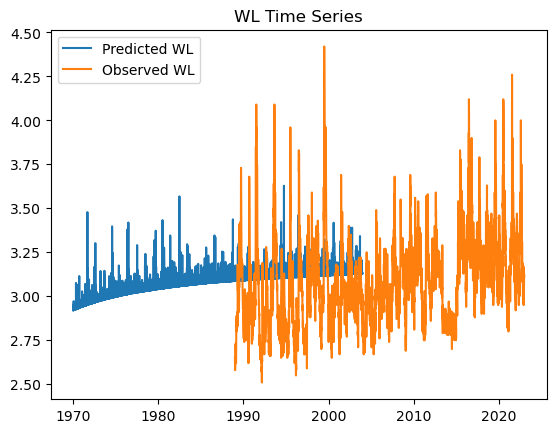

In [17]:
plt.plot(y_pred)
plt.plot(history_wl)
plt.legend(['Predicted WL', 'Observed WL'])
plt. title('WL Time Series')
plt.show()

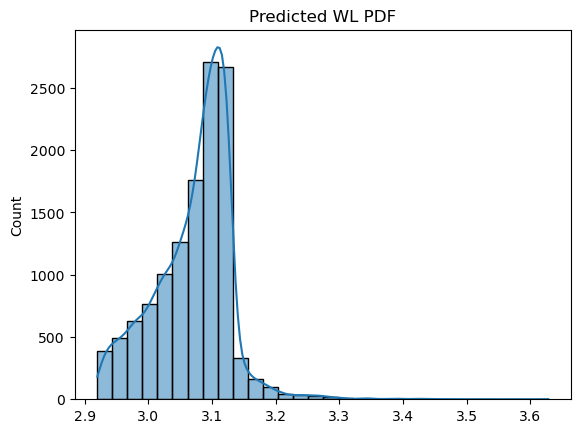

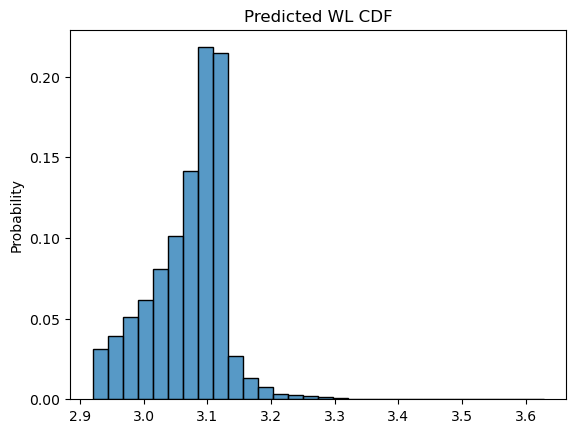

In [18]:
import seaborn as sns

sns.histplot(y_pred, bins=30, kde=True)
plt.title('Predicted WL PDF')
plt.show()

sns.histplot(y_pred, bins=30, kde=False, stat="probability") 
plt.title('Predicted WL CDF')
plt.show()

## 将上面的图片合并成一张图片

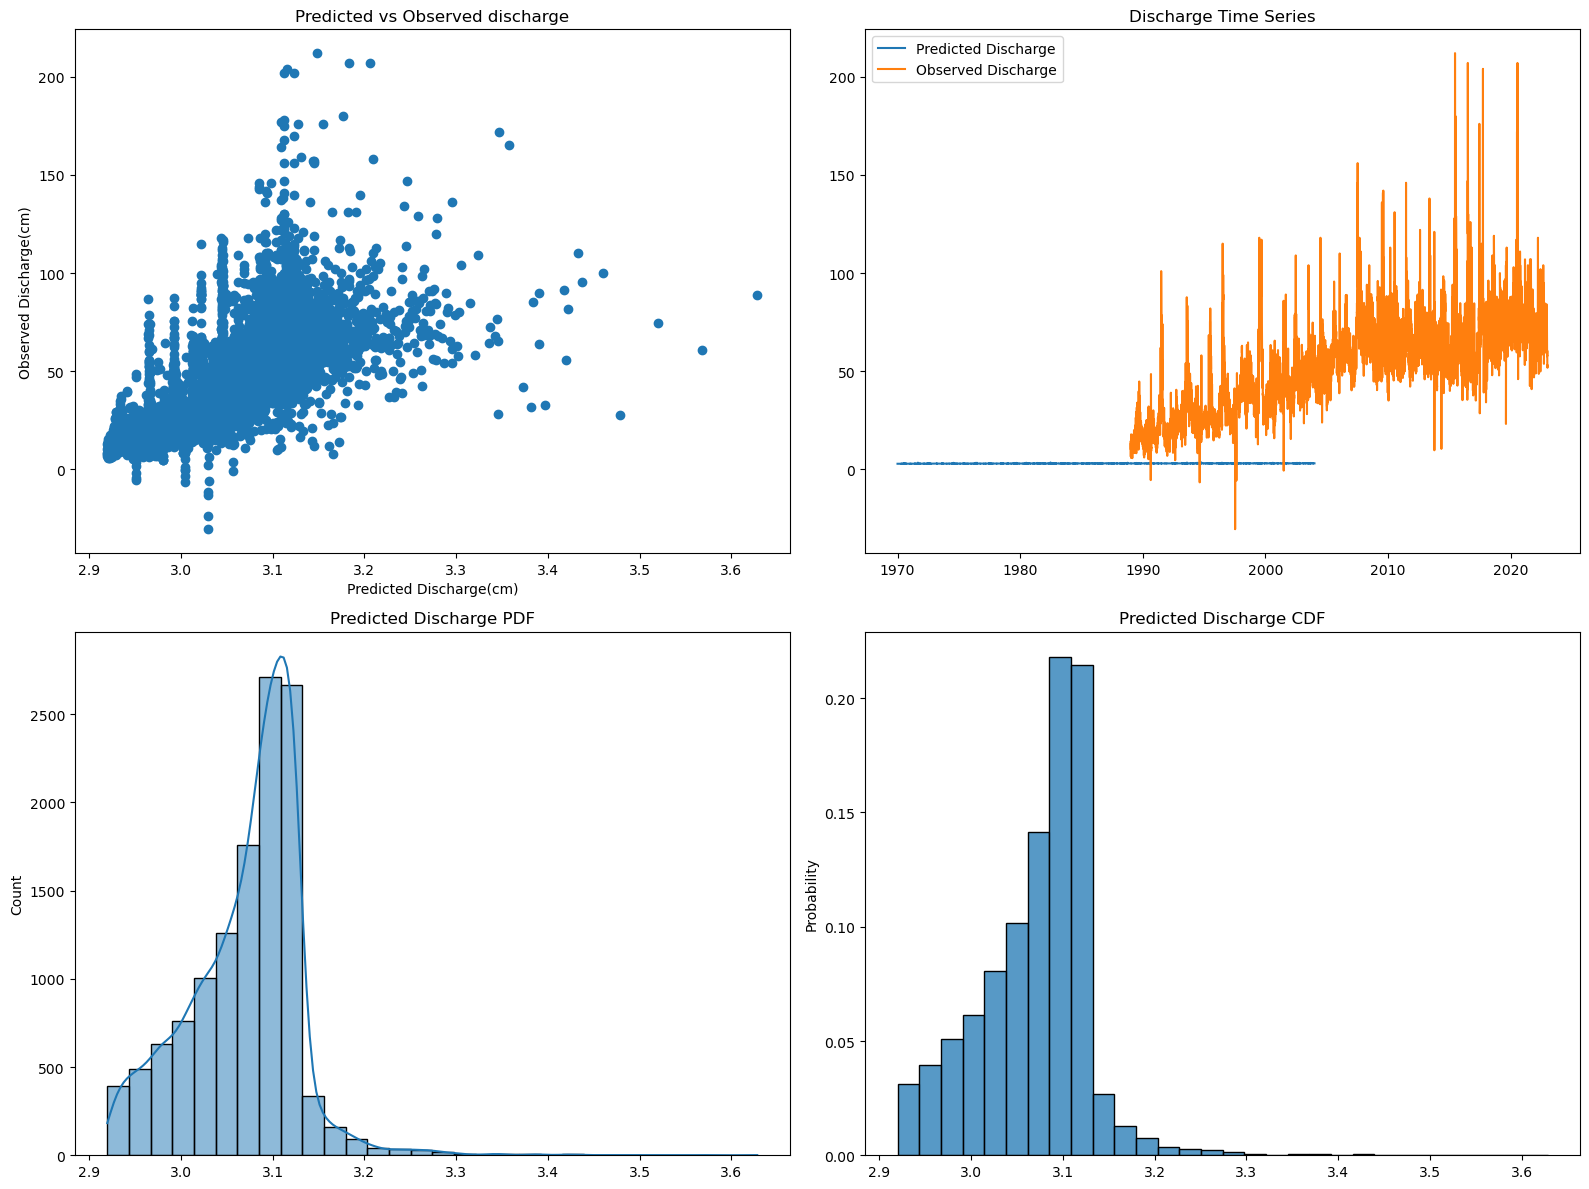

In [19]:
import seaborn as sns
fig = plt.figure(figsize=(16, 12))

# Scatter plot of Predicted vs Observed WL
ax1 = fig.add_subplot(221)
ax1.scatter(y_pred, history_discharge)
ax1.set_xlabel('Predicted Discharge(cm)')
ax1.set_ylabel('Observed Discharge(cm)')
ax1.set_title('Predicted vs Observed discharge')

# Time series plot
ax2 = fig.add_subplot(222)
ax2.plot(y_pred)
ax2.plot(history_discharge)
ax2.legend(['Predicted Discharge', 'Observed Discharge'])
ax2.set_title('Discharge Time Series')

# Histogram (PDF)
ax3 = fig.add_subplot(223)
sns.histplot(y_pred, bins=30, kde=True, ax=ax3)
ax3.set_title('Predicted Discharge PDF')

# Histogram (CDF)
ax4 = fig.add_subplot(224)
sns.histplot(y_pred, bins=30, kde=False, stat="probability", ax=ax4) 
ax4.set_title('Predicted Discharge CDF')

# Automatically adjust subplot params so that the subplotS fits in to the figure area
plt.tight_layout()

# Display the figure with subplots
plt.show()

## SSP情景

In [20]:
np.percentile(wl_ssp245, 100)

NameError: name 'np' is not defined

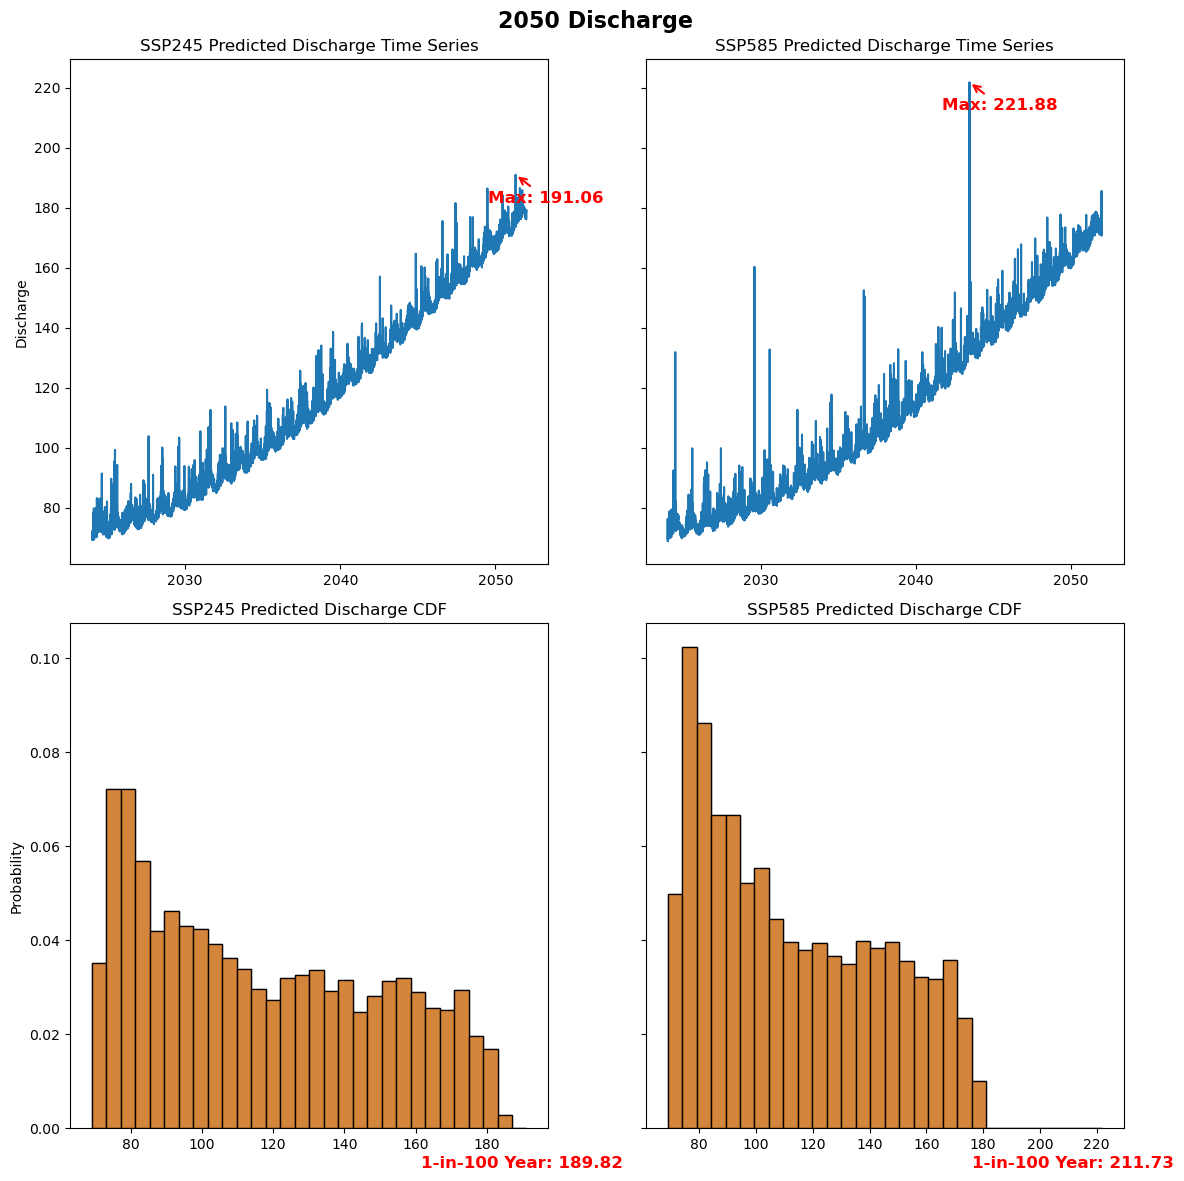

In [ ]:
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
discharge_ssp245 = discharge_ssp245.loc[:'2050-12-31']
discharge_ssp585 = discharge_ssp585.loc[:'2050-12-31']
# 生成ssp245和ssp585预测值的时间序列
discharge_2050 = pd.date_range(start='2023-12-31', periods=len(discharge_ssp245), freq='D')

# 创建图形和轴对象
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12), sharey='row')

# 添加主标题
plt.suptitle('2050 Discharge',fontsize=16, fontweight='bold')

# 在第一个子图上画ssp245预测值变化曲线
ax1.plot(discharge_2050, discharge_ssp245.values, label='ssp245')
ax1.set_title('SSP245 Predicted Discharge Time Series')
ax1.set_ylabel('Discharge')

# 在第二个子图上画ssp585预测值变化曲线
ax2.plot(discharge_2050, discharge_ssp585.values, label='ssp585')
ax2.set_title('SSP585 Predicted Discharge Time Series')

# 设置x轴标签为日期
date_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(date_format)
ax2.xaxis.set_major_formatter(date_format)

ax1.xaxis.set_major_locator(mdates.YearLocator(10)) 
ax2.xaxis.set_major_locator(mdates.YearLocator(10))


# 在第三个子图上绘制ssp245的直方图（CDF）
sns.histplot(discharge_ssp245, bins=30, kde=False, stat="probability", ax=ax3) 
ax3.set_title('SSP245 Predicted Discharge CDF')

# 在第四个子图上绘制ssp585的直方图（CDF）
sns.histplot(discharge_ssp585, bins=30, kde=False, stat="probability", ax=ax4) 
ax4.set_title('SSP585 Predicted Discharge CDF')

# 标注ssp245最高水位点
max_index_ssp245 = np.argmax(discharge_ssp245.values)
max_value_ssp245 = discharge_ssp245.values[max_index_ssp245]
max_date_ssp245 = discharge_2100[max_index_ssp245]
ax1.annotate(f'Max: {max_value_ssp245:.2f}', xy=(max_date_ssp245, max_value_ssp245), xytext=(-20, -20),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red', linewidth=1.5),
             fontsize=12, fontweight='bold', color='red')

# 标注ssp585最高水位点
max_index_ssp585 = np.argmax(discharge_ssp585.values)
max_value_ssp585 = discharge_ssp585.values[max_index_ssp585]
max_date_ssp585 = discharge_2100[max_index_ssp585]
ax2.annotate(f'Max: {max_value_ssp585:.2f}', xy=(max_date_ssp585, max_value_ssp585), xytext=(-20, -20),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red', linewidth=1.5),
             fontsize=12, fontweight='bold', color='red')

# 在第三个子图上绘制ssp245的直方图（CDF）并标注百年一遇水位
sns.histplot(discharge_ssp245, bins=30, kde=False, stat="probability", ax=ax3) 
ax3.set_title('SSP245 Predicted Discharge CDF')
y_1in100 = np.percentile(discharge_ssp245, 100-1/365)
ax3.annotate(f'1-in-100 Year: {y_1in100:.2f}', xy=(y_1in100, 0), xytext=(0, -20),
             textcoords='offset points', ha='center', va='top', fontsize=12, fontweight='bold', color='red')

# 在第四个子图上绘制ssp585的直方图（CDF）并标注百年一遇水位
sns.histplot(discharge_ssp585, bins=30, kde=False, stat="probability", ax=ax4) 
ax4.set_title('SSP585 Predicted Discharge CDF')
y_1in100 = np.percentile(discharge_ssp585, 100-1/365)
ax4.annotate(f'1-in-100 Year: {y_1in100:.2f}', xy=(y_1in100, 0), xytext=(0, -20),
             textcoords='offset points', ha='center', va='top', fontsize=12, fontweight='bold', color='red')



# 调整子图之间的间距
fig.tight_layout()

# 显示图形
plt.show()

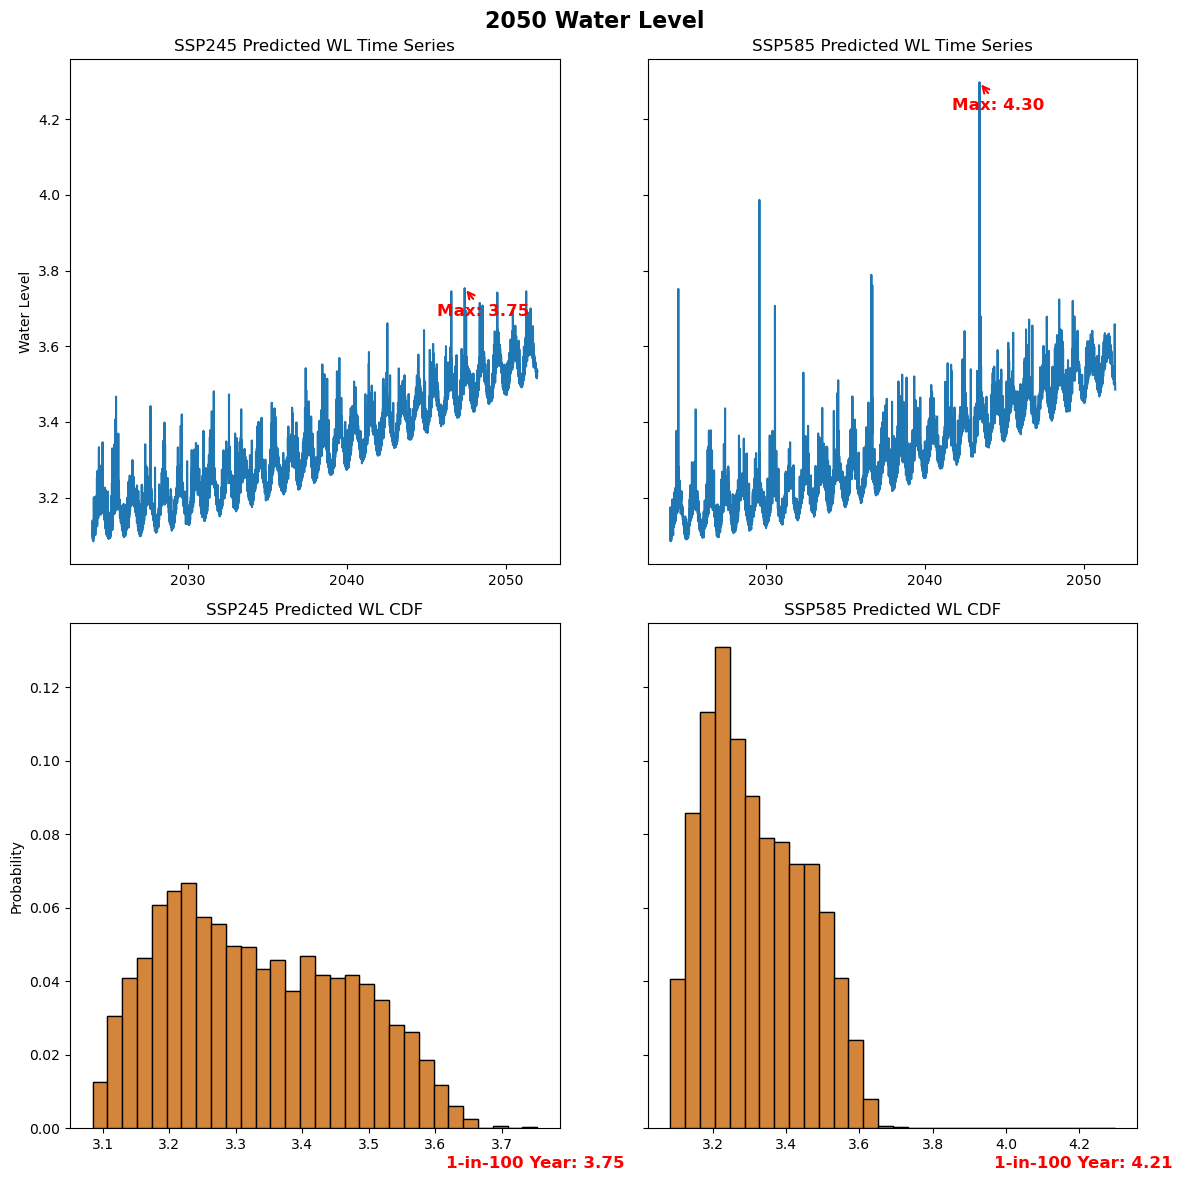

In [ ]:
wl_ssp245 = wl_ssp245.loc[:'2050-12-31']
wl_ssp585 = wl_ssp585.loc[:'2050-12-31']

import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

# 生成ssp245和ssp585预测值的时间序列
wl_2050 = pd.date_range(start='2023-12-31', periods=len(wl_ssp245), freq='D')

# 创建图形和轴对象
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12), sharey='row')

# 添加主标题
plt.suptitle('2050 Water Level',fontsize=16, fontweight='bold')

# 在第一个子图上画ssp245预测值变化曲线
ax1.plot(wl_2050, wl_ssp245.values, label='ssp245')
ax1.set_title('SSP245 Predicted WL Time Series')
ax1.set_ylabel('Water Level')

# 在第二个子图上画ssp585预测值变化曲线
ax2.plot(wl_2050, wl_ssp585.values, label='ssp585')
ax2.set_title('SSP585 Predicted WL Time Series')

# 设置x轴标签为日期
date_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(date_format)
ax2.xaxis.set_major_formatter(date_format)

ax1.xaxis.set_major_locator(mdates.YearLocator(10)) 
ax2.xaxis.set_major_locator(mdates.YearLocator(10))


# 在第三个子图上绘制ssp245的直方图（CDF）
sns.histplot(wl_ssp245, bins=30, kde=False, stat="probability", ax=ax3) 
ax3.set_title('SSP245 Predicted WL CDF')

# 在第四个子图上绘制ssp585的直方图（CDF）
sns.histplot(wl_ssp585, bins=30, kde=False, stat="probability", ax=ax4) 
ax4.set_title('SSP585 Predicted WL CDF')

# 标注ssp245最高水位点
max_index_ssp245 = np.argmax(wl_ssp245.values)
max_value_ssp245 = wl_ssp245.values[max_index_ssp245]
max_date_ssp245 = wl_2100[max_index_ssp245]
ax1.annotate(f'Max: {max_value_ssp245:.2f}', xy=(max_date_ssp245, max_value_ssp245), xytext=(-20, -20),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red', linewidth=1.5),
             fontsize=12, fontweight='bold', color='red')

# 标注ssp585最高水位点
max_index_ssp585 = np.argmax(wl_ssp585.values)
max_value_ssp585 = wl_ssp585.values[max_index_ssp585]
max_date_ssp585 = wl_2100[max_index_ssp585]
ax2.annotate(f'Max: {max_value_ssp585:.2f}', xy=(max_date_ssp585, max_value_ssp585), xytext=(-20, -20),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red', linewidth=1.5),
             fontsize=12, fontweight='bold', color='red')

# 在第三个子图上绘制ssp245的直方图（CDF）并标注百年一遇水位
sns.histplot(wl_ssp245, bins=30, kde=False, stat="probability", ax=ax3) 
ax3.set_title('SSP245 Predicted WL CDF')
y_1in100 = np.percentile(wl_ssp245, 100-1/365)
ax3.annotate(f'1-in-100 Year: {y_1in100:.2f}', xy=(y_1in100, 0), xytext=(0, -20),
             textcoords='offset points', ha='center', va='top', fontsize=12, fontweight='bold', color='red')

# 在第四个子图上绘制ssp585的直方图（CDF）并标注百年一遇水位
sns.histplot(wl_ssp585, bins=30, kde=False, stat="probability", ax=ax4) 
ax4.set_title('SSP585 Predicted WL CDF')
y_1in100 = np.percentile(wl_ssp585, 100-1/365)
ax4.annotate(f'1-in-100 Year: {y_1in100:.2f}', xy=(y_1in100, 0), xytext=(0, -20),
             textcoords='offset points', ha='center', va='top', fontsize=12, fontweight='bold', color='red')



# 调整子图之间的间距
fig.tight_layout()

# 显示图形
plt.show()

在同一个时间序列上画出ssp245和ssp585的预测曲线,可以清楚地看到两者的变化趋势和差异:
- SSP245预测值变化范围较小,代表温室气体排放控制得更严格,气候变化影响较小。
- SSP585预测值变化幅度较大,代表温室气体排放继续增加,气候变化影响更严重,导致地下水位也有较大幅度的变化。 
通过这个对比,可以评价不同温室气体排放情景下的地下水位变化,为未来的管理决策提供参考。

In [ ]:
df_245 = wl_ssp245.to_frame('water_level')
df_245.index = wl_ssp245.index

SSP245 max WL: 3.753620590331023
SSP245 min WL: 3.0847566730662495
SSP585 max WL: 4.297464020074574
SSP585 min WL: 3.0848485543729973


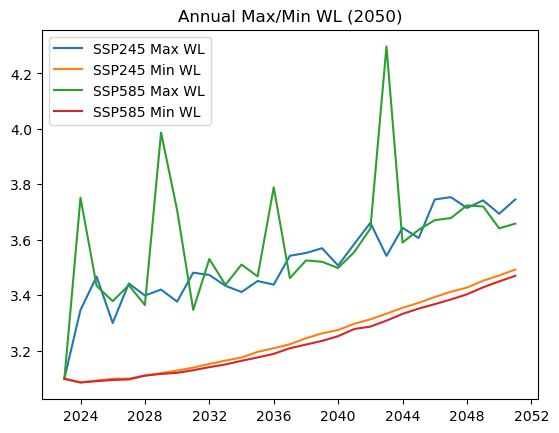

In [ ]:
# Convert the series to a dataframe and set the index as the series index
df_245 = wl_ssp245.to_frame(name='water_level')
df_245.index = pd.to_datetime(wl_ssp245.index)

# Do the same for wl_ssp585
df_585 = wl_ssp585.to_frame(name='water_level')
df_585.index = pd.to_datetime(wl_ssp585.index)


# Calculate maximum and minimum values
max_245 = df_245['water_level'].max()
min_245 = df_245['water_level'].min()
max_585 = df_585['water_level'].max()
min_585 = df_585['water_level'].min()

print('SSP245 max WL:', max_245)
print('SSP245 min WL:', min_245)
print('SSP585 max WL:', max_585)
print('SSP585 min WL:', min_585)

# Resample and calculate annual maxima and minima
annual_max_245 = df_245.resample('A').max()
annual_min_245 = df_245.resample('A').min()
annual_max_585 = df_585.resample('A').max()
annual_min_585 = df_585.resample('A').min()
# Plot results

# Maximum and minimum values
plt.plot(annual_max_245, label='SSP245 Max WL')
plt.plot(annual_min_245, label='SSP245 Min WL')
plt.plot(annual_max_585, label='SSP585 Max WL')
plt.plot(annual_min_585, label='SSP585 Min WL')
plt.legend()
plt.title('Annual Max/Min WL (2050)')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Plot the SSP245 water level
ax.plot(df_245.index, df_245['water_level'], label='SSP245')

# Plot the SSP585 water level
ax.plot(df_585.index, df_585['water_level'], label='SSP585')

texts = []

# Add annotations for SSP245
for i, value in enumerate(top3_245):
    text = plt.text(top3_245.index[i], value, f'Top {i+1}: {value:.1f}',
                    fontsize=10, fontweight='bold', color='red')
    texts.append(text)

# Add annotations for SSP585
for i, value in enumerate(top3_585):
    text = plt.text(top3_585.index[i], value, f'Top {i+1}: {value:.1f}',
                    fontsize=10, fontweight='bold', color='blue')
    texts.append(text)

# Automatically adjust the positions of the texts
adjust_text(texts, force_text=0.05, force_points=0.05,
            expand_text=(1.01, 1.05), expand_points=(1.01, 1.05),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5))

plt.show()


NameError: name 'ax' is not defined

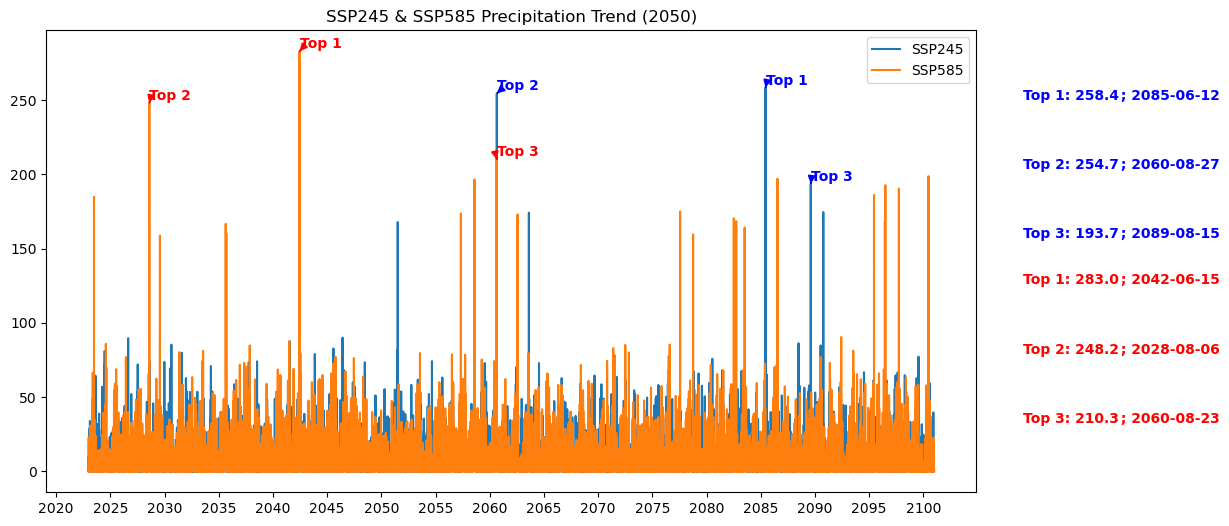

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from adjustText import adjust_text

# Convert the series to a dataframe and set the index as the series index
df_245 = precip_ssp245.to_frame(name='discharge')
df_245.index = pd.to_datetime(precip_ssp245.index)

# Do the same for wl_ssp585
df_585 = precip_ssp585.to_frame(name='discharge')
df_585.index = pd.to_datetime(precip_ssp585.index)

# Calculate maximum values
max_245 = df_245['discharge'].max()
max_585 = df_585['discharge'].max()

# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))

# Find the indices of the top 3 max water levels for each DataFrame
top3_245 = df_245['discharge'].nlargest(3)
top3_585 = df_585['discharge'].nlargest(3)

# Plot the SSP245 water level
line_245, = ax.plot(df_245.index, df_245['discharge'], label='SSP245')

# Plot the SSP585 water level
line_585, = ax.plot(df_585.index, df_585['discharge'], label='SSP585')

texts = []

import pandas as pd
import numpy as np

# Define the offset variable
offset = 0.5

# Add annotations for SSP245
for i, value in enumerate(top3_245):
    text = ax.text(top3_245.index[i], value, f'Top {i+1}',
                   fontsize=10, fontweight='bold', color='blue')
    texts.append(text)
    # Extend the annotation lines with a slight random offset to make them slanted
    days = pd.Timedelta(np.random.uniform(-30, 30), unit='D')  # Adjust these values as needed
    ax.annotate('', xy=(top3_245.index[i], value), xytext=(top3_245.index[i] + days, value + offset),
                arrowprops=dict(arrowstyle='-|>', lw=1.5, color='blue'))

# Add annotations for SSP585
for i, value in enumerate(top3_585):
    text = ax.text(top3_585.index[i], value, f'Top {i+1}',
                   fontsize=10, fontweight='bold', color='red')
    texts.append(text)
    # Extend the annotation lines with a slight random offset to make them slanted
    days = pd.Timedelta(np.random.uniform(-30, 30), unit='D')  # Adjust these values as needed
    ax.annotate('', xy=(top3_585.index[i], value), xytext=(top3_585.index[i] + days, value + offset),
                arrowprops=dict(arrowstyle='-|>', lw=1.5, color='red'))

# Automatically adjust the positions of the texts
adjust_text(texts, force_text=0.05, force_points=0.05,
            expand_text=(1.01, 1.05), expand_points=(1.01, 1.05),
            arrowprops=dict(arrowstyle='-', lw=0.5, color='black'))

# Set the x-axis formatter to display only years at 5-year intervals
ax.xaxis.set_major_locator(mdates.YearLocator(base=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set the title and legend
plt.title('SSP245 & SSP585 Precipitation Trend (2050)')
plt.legend()

# Output the top 3 values for SSP245 on the right side of the plot
for i, value in enumerate(top3_245):
    plt.text(1.05, 0.85 - i * 0.15, f'Top {i+1}: {value:.1f} ', transform=ax.transAxes,
             fontsize=10, fontweight='bold', color='blue')

# Output the top 3 values for SSP585 on the right side of the plot
for i, value in enumerate(top3_585):
    plt.text(1.05, 0.45 - i * 0.15, f'Top {i+1}: {value:.1f}', transform=ax.transAxes,
             fontsize=10, fontweight='bold', color='red')

# Output the date and time for each top on the right side of the plot
for i, date in enumerate(top3_245.index):
    plt.text(1.15, 0.85 - i * 0.15, f' ; {date.strftime("%Y-%m-%d")}', transform=ax.transAxes,
             fontsize=10, fontweight='bold', color='blue')

for i, date in enumerate(top3_585.index):
    plt.text(1.15, 0.45 - i * 0.15, f' ; {date.strftime("%Y-%m-%d")}', transform=ax.transAxes,
             fontsize=10, fontweight='bold', color='red')

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from adjustText import adjust_text

# Convert the series to a dataframe and set the index as the series index
df_245 = precip_ssp245.to_frame(name='discharge')
df_245.index = pd.to_datetime(precip_ssp245.index)

# Do the same for wl_ssp585
df_585 = precip_ssp585.to_frame(name='discharge')
df_585.index = pd.to_datetime(precip_ssp585.index)

# Calculate maximum values
max_245 = df_245['discharge'].max()
max_585 = df_585['discharge'].max()

# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))

# Find the indices of the top 3 max water levels for each DataFrame
top3_245 = df_245['discharge'].nlargest(3)
top3_585 = df_585['discharge'].nlargest(3)

# Plot the SSP245 water level
line_245, = ax.plot(df_245.index, df_245['discharge'], label='SSP245')

# Plot the SSP585 water level
line_585, = ax.plot(df_585.index, df_585['discharge'], label='SSP585')

texts = []

import pandas as pd
import numpy as np

# Define the offset variable
offset = 0.5

# Add annotations for SSP245
for i, value in enumerate(top3_245):
    text = ax.text(top3_245.index[i], value, f'Top {i+1}',
                   fontsize=10, fontweight='bold', color='blue')
    texts.append(text)
    # Extend the annotation lines with a slight random offset to make them slanted
    days = pd.Timedelta(np.random.uniform(-30, 30), unit='D')  # Adjust these values as needed
    ax.annotate('', xy=(top3_245.index[i], value), xytext=(top3_245.index[i] + days, value + offset),
                arrowprops=dict(arrowstyle='-|>', lw=1.5, color='blue'))

# Add annotations for SSP585
for i, value in enumerate(top3_585):
    text = ax.text(top3_585.index[i], value, f'Top {i+1}',
                   fontsize=10, fontweight='bold', color='red')
    texts.append(text)
    # Extend the annotation lines with a slight random offset to make them slanted
    days = pd.Timedelta(np.random.uniform(-30, 30), unit='D')  # Adjust these values as needed
    ax.annotate('', xy=(top3_585.index[i], value), xytext=(top3_585.index[i] + days, value + offset),
                arrowprops=dict(arrowstyle='-|>', lw=1.5, color='red'))

# Automatically adjust the positions of the texts
adjust_text(texts, force_text=0.05, force_points=0.05,
            expand_text=(1.01, 1.05), expand_points=(1.01, 1.05),
            arrowprops=dict(arrowstyle='-', lw=0.5, color='black'))

# Set the x-axis formatter to display only years at 5-year intervals
ax.xaxis.set_major_locator(mdates.YearLocator(base=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set the title and legend
plt.title('SSP245 & SSP585 Precipitation Trend (2050)')
plt.legend()

# Output the top 3 values for SSP245 on the right side of the plot
for i, value in enumerate(top3_245):
    plt.text(1.05, 0.85 - i * 0.15, f'Top {i+1}: {value:.1f} ', transform=ax.transAxes,
             fontsize=10, fontweight='bold', color='blue')

# Output the top 3 values for SSP585 on the right side of the plot
for i, value in enumerate(top3_585):
    plt.text(1.05, 0.45 - i * 0.15, f'Top {i+1}: {value:.1f}', transform=ax.transAxes,
             fontsize=10, fontweight='bold', color='red')

# Output the date and time for each top on the right side of the plot
for i, date in enumerate(top3_245.index):
    plt.text(1.15, 0.85 - i * 0.15, f' ; {date.strftime("%Y-%m-%d")}', transform=ax.transAxes,
             fontsize=10, fontweight='bold', color='blue')

for i, date in enumerate(top3_585.index):
    plt.text(1.15, 0.45 - i * 0.15, f' ; {date.strftime("%Y-%m-%d")}', transform=ax.transAxes,
             fontsize=10, fontweight='bold', color='red')

# Show the plot
plt.show()

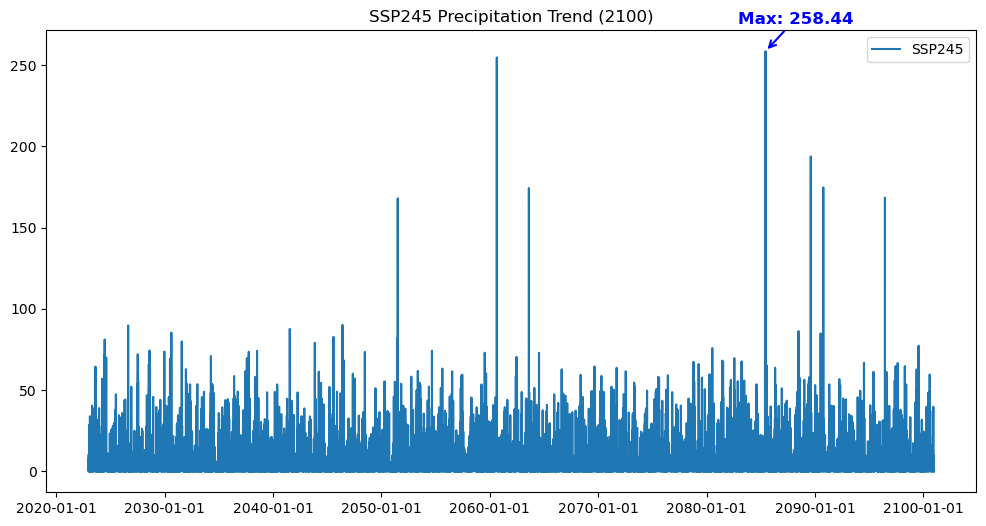

In [8]:
import matplotlib.dates as mdates

# Convert the series to a dataframe and set the index as the series index
df_245 = precip_ssp245.to_frame(name='precip')
df_245.index = pd.to_datetime(precip_ssp245.index)


# Calculate maximum values
max_245 = df_245['precip'].max()
# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))

# Plot SSP245 water level
ax.plot(df_245.index, df_245['precip'], label='SSP245')

ax.annotate(f'Max: {max_245:.2f}', xy=(df_245.loc[df_245['precip'].idxmax()].name, max_245),
            xytext=(-20, 20), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='blue', linewidth=1.5),
            fontsize=12, fontweight='bold', color='blue')



# Set the x-axis formatter
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)

# Set the title and legend
plt.title('SSP245 Precipitation Trend (2100)')
plt.legend()

# Show the plot
plt.show()

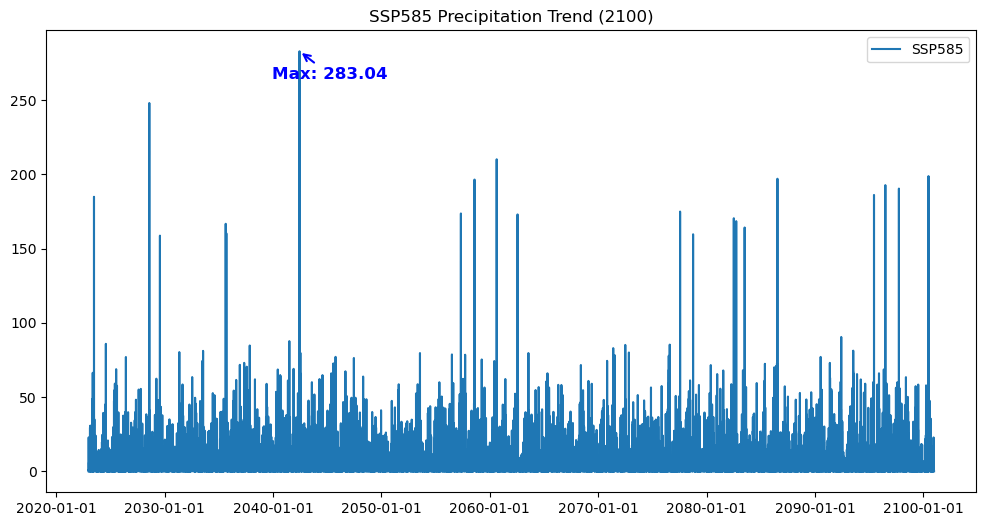

In [11]:
import matplotlib.dates as mdates

# Do the same for wl_ssp585
df_585 = precip_ssp585.to_frame(name='precip')
df_585.index = pd.to_datetime(precip_ssp585.index)

# Calculate maximum values
max_585 = df_585['precip'].max()

# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))

# Plot SSP585 water level
ax.plot(df_585.index, df_585['precip'], label='SSP585')

ax.annotate(f'Max: {max_585:.2f}', xy=(df_585.loc[df_585['precip'].idxmax()].name, max_585),
            xytext=(-20, -20), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='blue', linewidth=1.5),
            fontsize=12, fontweight='bold', color='blue')


# Set the x-axis formatter
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)

# Set the title and legend
plt.title('SSP585 Precipitation Trend (2100)')
plt.legend()

# Show the plot
plt.show()

# Generalized Linear Model, GLM

Mean Squared Error: 0.03969081308354921
R2: 0.3147425143793916


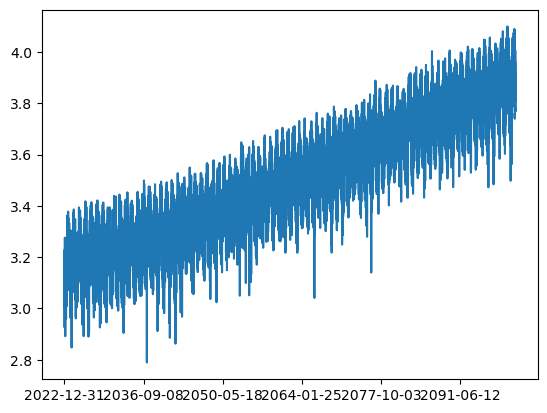

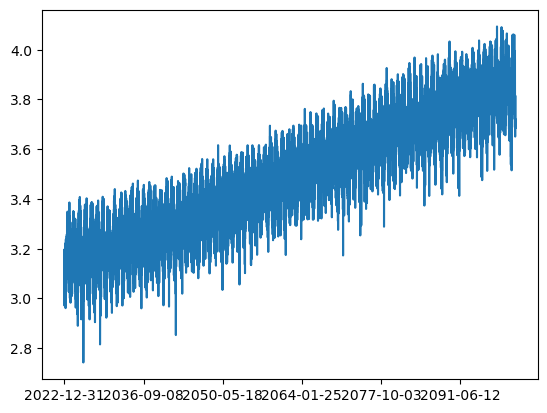

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gaussian
import matplotlib.pyplot as plt

# Combine history and features data
combined_data = history.join(features, lsuffix='_history', rsuffix='_features')

# Reset the index of combined_data
combined_data.reset_index(drop=True, inplace=True)

# Initialize and fit the GLM model
model = GLM(history_wl, combined_data, family=Gaussian())
glm_results = model.fit()

# Generate predictions for history data
y_pred = glm_results.predict(combined_data)
mse = mean_squared_error(history_wl, y_pred)
r2 = r2_score(history_wl, y_pred)
print('Mean Squared Error:', mse)
print('R2:', r2)

# Generate predictions for ssp245 data
features_ssp245 = ssp245[['precip_suzhou', 'runoff_suzhou', 'ETo_HS']]
features_ssp245 = sm.add_constant(features_ssp245)
combined_data_ssp245 = ssp245.join(features_ssp245, lsuffix='_ssp245', rsuffix='_features')
wl_ssp245 = glm_results.predict(combined_data_ssp245)

# Plot the predictions for ssp245 data
wl_ssp245.plot()
plt.show()

# Generate predictions for ssp585 data
features_ssp585 = ssp585[['precip_suzhou', 'runoff_suzhou', 'ETo_HS']]
features_ssp585 = sm.add_constant(features_ssp585)
combined_data_ssp585 = ssp585.join(features_ssp585, lsuffix='_ssp585', rsuffix='_features')
wl_ssp585 = glm_results.predict(combined_data_ssp585)

# Plot the predictions for ssp585 data
wl_ssp585.plot()
plt.show()


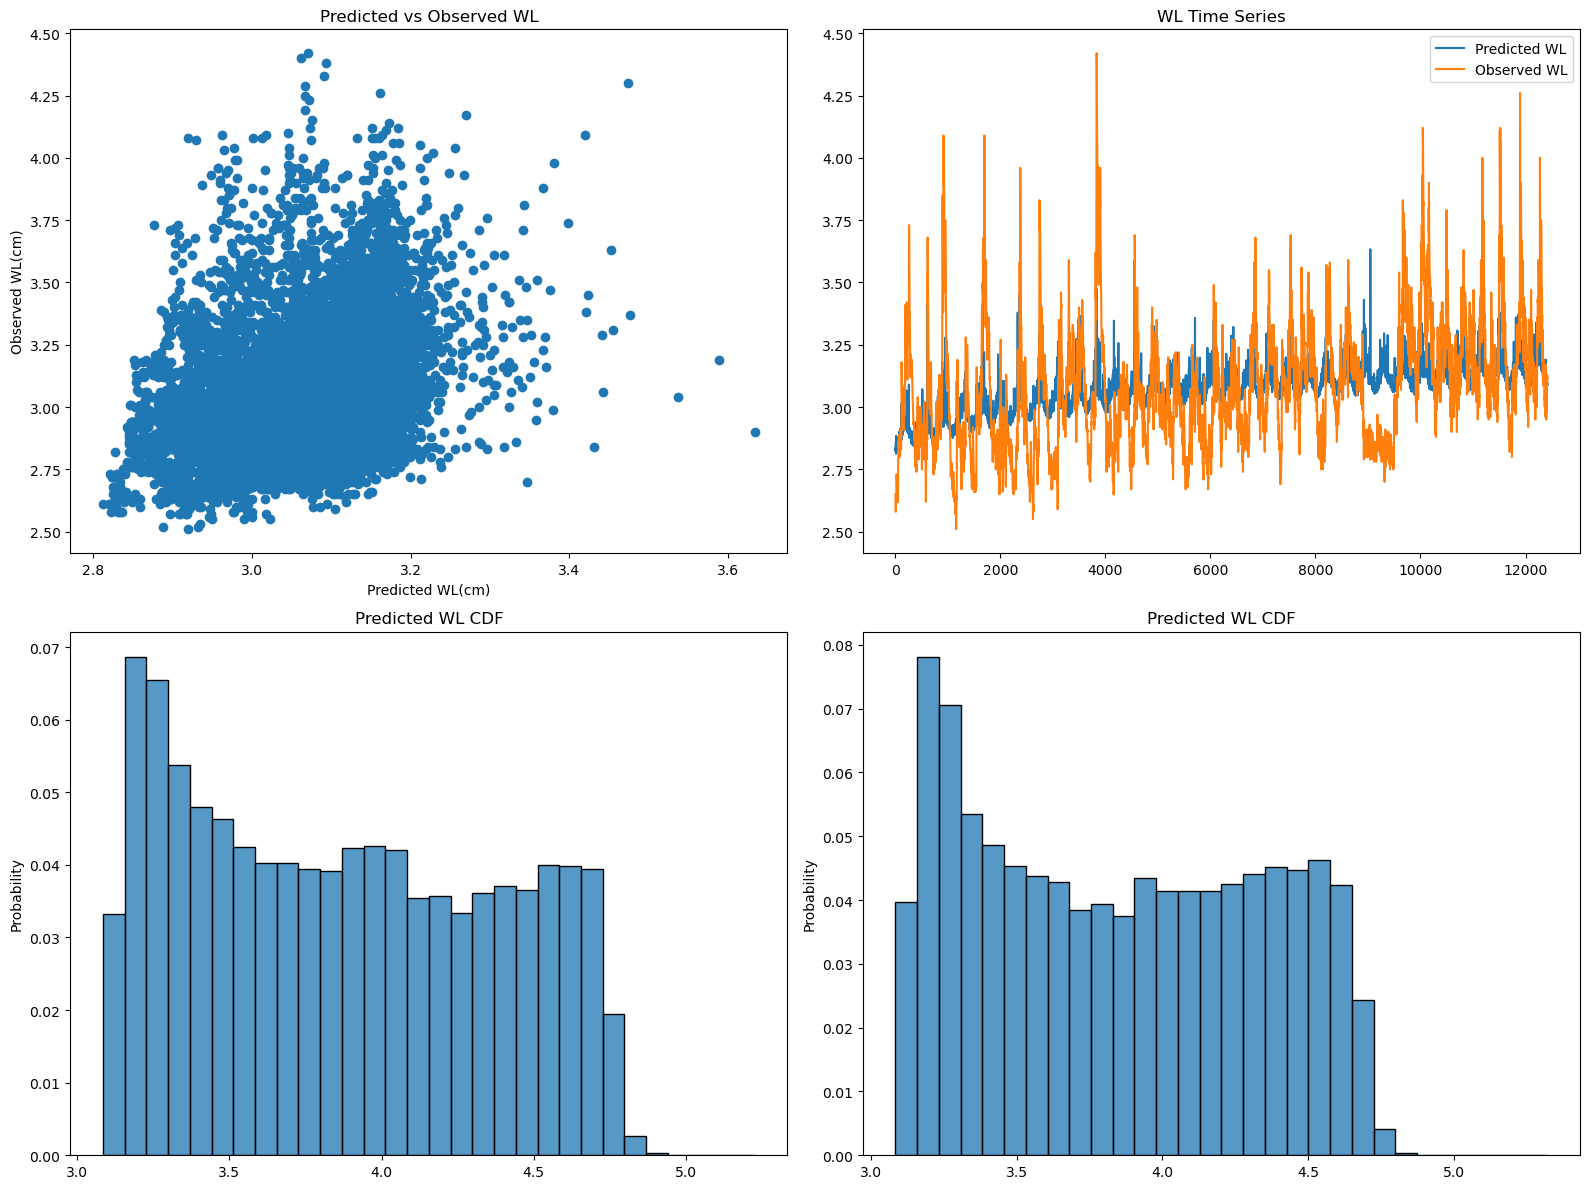

In [ ]:
fig = plt.figure(figsize=(16, 12))

# Scatter plot of Predicted vs Observed WL
ax1 = fig.add_subplot(221)
ax1.scatter(y_pred, history_wl)
ax1.set_xlabel('Predicted WL(cm)')
ax1.set_ylabel('Observed WL(cm)')
ax1.set_title('Predicted vs Observed WL')

# Time series plot
ax2 = fig.add_subplot(222)
ax2.plot(y_pred)
ax2.plot(history_wl)
ax2.legend(['Predicted WL', 'Observed WL'])
ax2.set_title('WL Time Series')

# Histogram (PDF)
ax3 = fig.add_subplot(223)
sns.histplot(wl_ssp245, bins=30, kde=False, stat="probability", ax=ax3) 
ax3.set_title('Predicted WL CDF')

# Histogram (CDF)
ax4 = fig.add_subplot(224)
sns.histplot(wl_ssp585, bins=30, kde=False, stat="probability", ax=ax4) 
ax4.set_title('Predicted WL CDF')

# Automatically adjust subplot params so that the subplotS fits in to the figure area
plt.tight_layout()

# Display the figure with subplots
plt.show()

# Prophet (不合适)

In [ ]:
from prophet import Prophet

# Load data
history = pd.read_csv('../data/results/history.csv', index_col='time',parse_dates=True)
ssp245 = pd.read_csv('../data/results/ssp245.csv', index_col=0)
ssp585 = pd.read_csv('../data/results/ssp585.csv', index_col=0)
history_wl = pd.read_csv('../data/results/history_wl.csv', index_col='time',parse_dates=True)

# Combine the data
history_wl_prophet = history_wl.reset_index().rename(columns={'time': 'ds', 'water_level': 'y'})

# Set the index of history to match with history_wl_prophet
history = history.set_index(history_wl_prophet.index)

for column in ['precip_suzhou','T2M','ETo_HS','runoff_suzhou']:
    history_wl_prophet[column] = history[column].values

# Split into train and test sets
train = history_wl_prophet.sample(frac=0.8, random_state=42)
test = history_wl_prophet.drop(train.index)

# Split the history data into training and testing data as well
history_train = history.loc[train.index]
history_test = history.loc[test.index]

# Initialize the model
model = Prophet()

# Add the historical factors as regressors
for column in ['precip_suzhou','T2M','ETo_HS','runoff_suzhou']:
    model.add_regressor(column)

# Fit the model using the training dataframe
model.fit(train)

future = model.make_future_dataframe(periods=len(ssp245.index), freq='D')

# Combine training history and ssp245 data
combined_precip_suzhou = history_train['precip_suzhou'].append(ssp245['precip_suzhou'])
combined_T2M = history_train['T2M'].append(ssp245['T2M'])
combined_ETo_HS = history_train['ETo_HS'].append(ssp245['ETo_HS'])
combined_runoff_suzhou = history_train['runoff_suzhou'].append(ssp245['runoff_suzhou'])

# Add the combined columns to the future dataframe
future['precip_suzhou'] = combined_precip_suzhou.values
future['T2M'] = combined_T2M.values
future['ETo_HS'] = combined_ETo_HS.values
future['runoff_suzhou'] = combined_runoff_suzhou.values

# Predict the future
forecast = model.predict(future)

21:58:04 - cmdstanpy - INFO - Chain [1] start processing
21:58:12 - cmdstanpy - INFO - Chain [1] done processing
/tmp/ipykernel_87084/1761393765.py:39: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_precip_suzhou = history_train['precip_suzhou'].append(ssp245['precip_suzhou'])
/tmp/ipykernel_87084/1761393765.py:40: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_T2M = history_train['T2M'].append(ssp245['T2M'])
/tmp/ipykernel_87084/1761393765.py:41: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_ETo_HS = history_train['ETo_HS'].append(ssp245['ETo_HS'])
/tmp/ipykernel_87084/1761393765.py:42: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use

<Axes: >

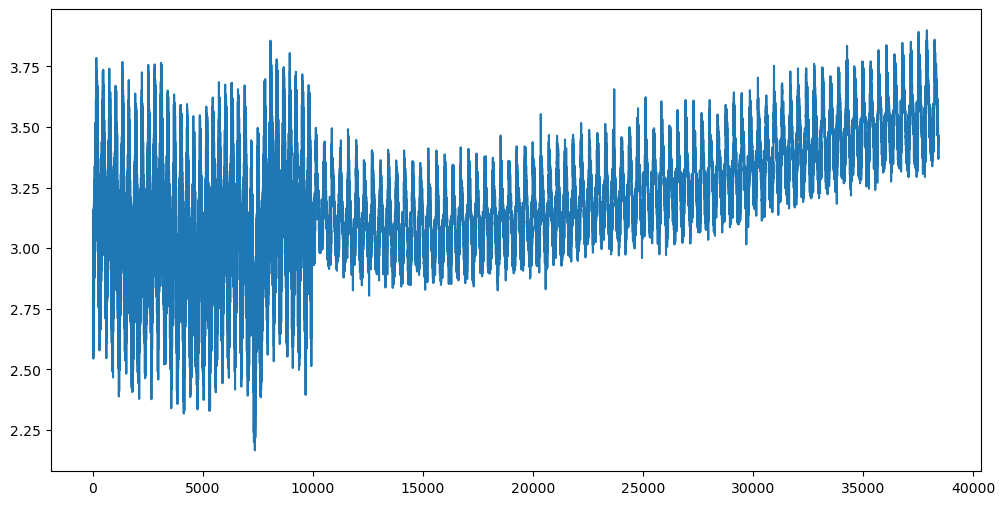

In [ ]:
forecast['yhat'].plot(figsize=(12,6))